In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, quantile_transform
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm

In [59]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/Assignment 3/kc_house_data.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [61]:
df.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [62]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [63]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [64]:
df['date'] = pd.to_datetime(df['date'])

In [65]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [66]:
df.insert(2, 'sale_month', df['date'].dt.month)
df.insert(3, 'sale_year', df['date'].dt.year)
df.insert(4, 'sale_day', df['date'].dt.day)

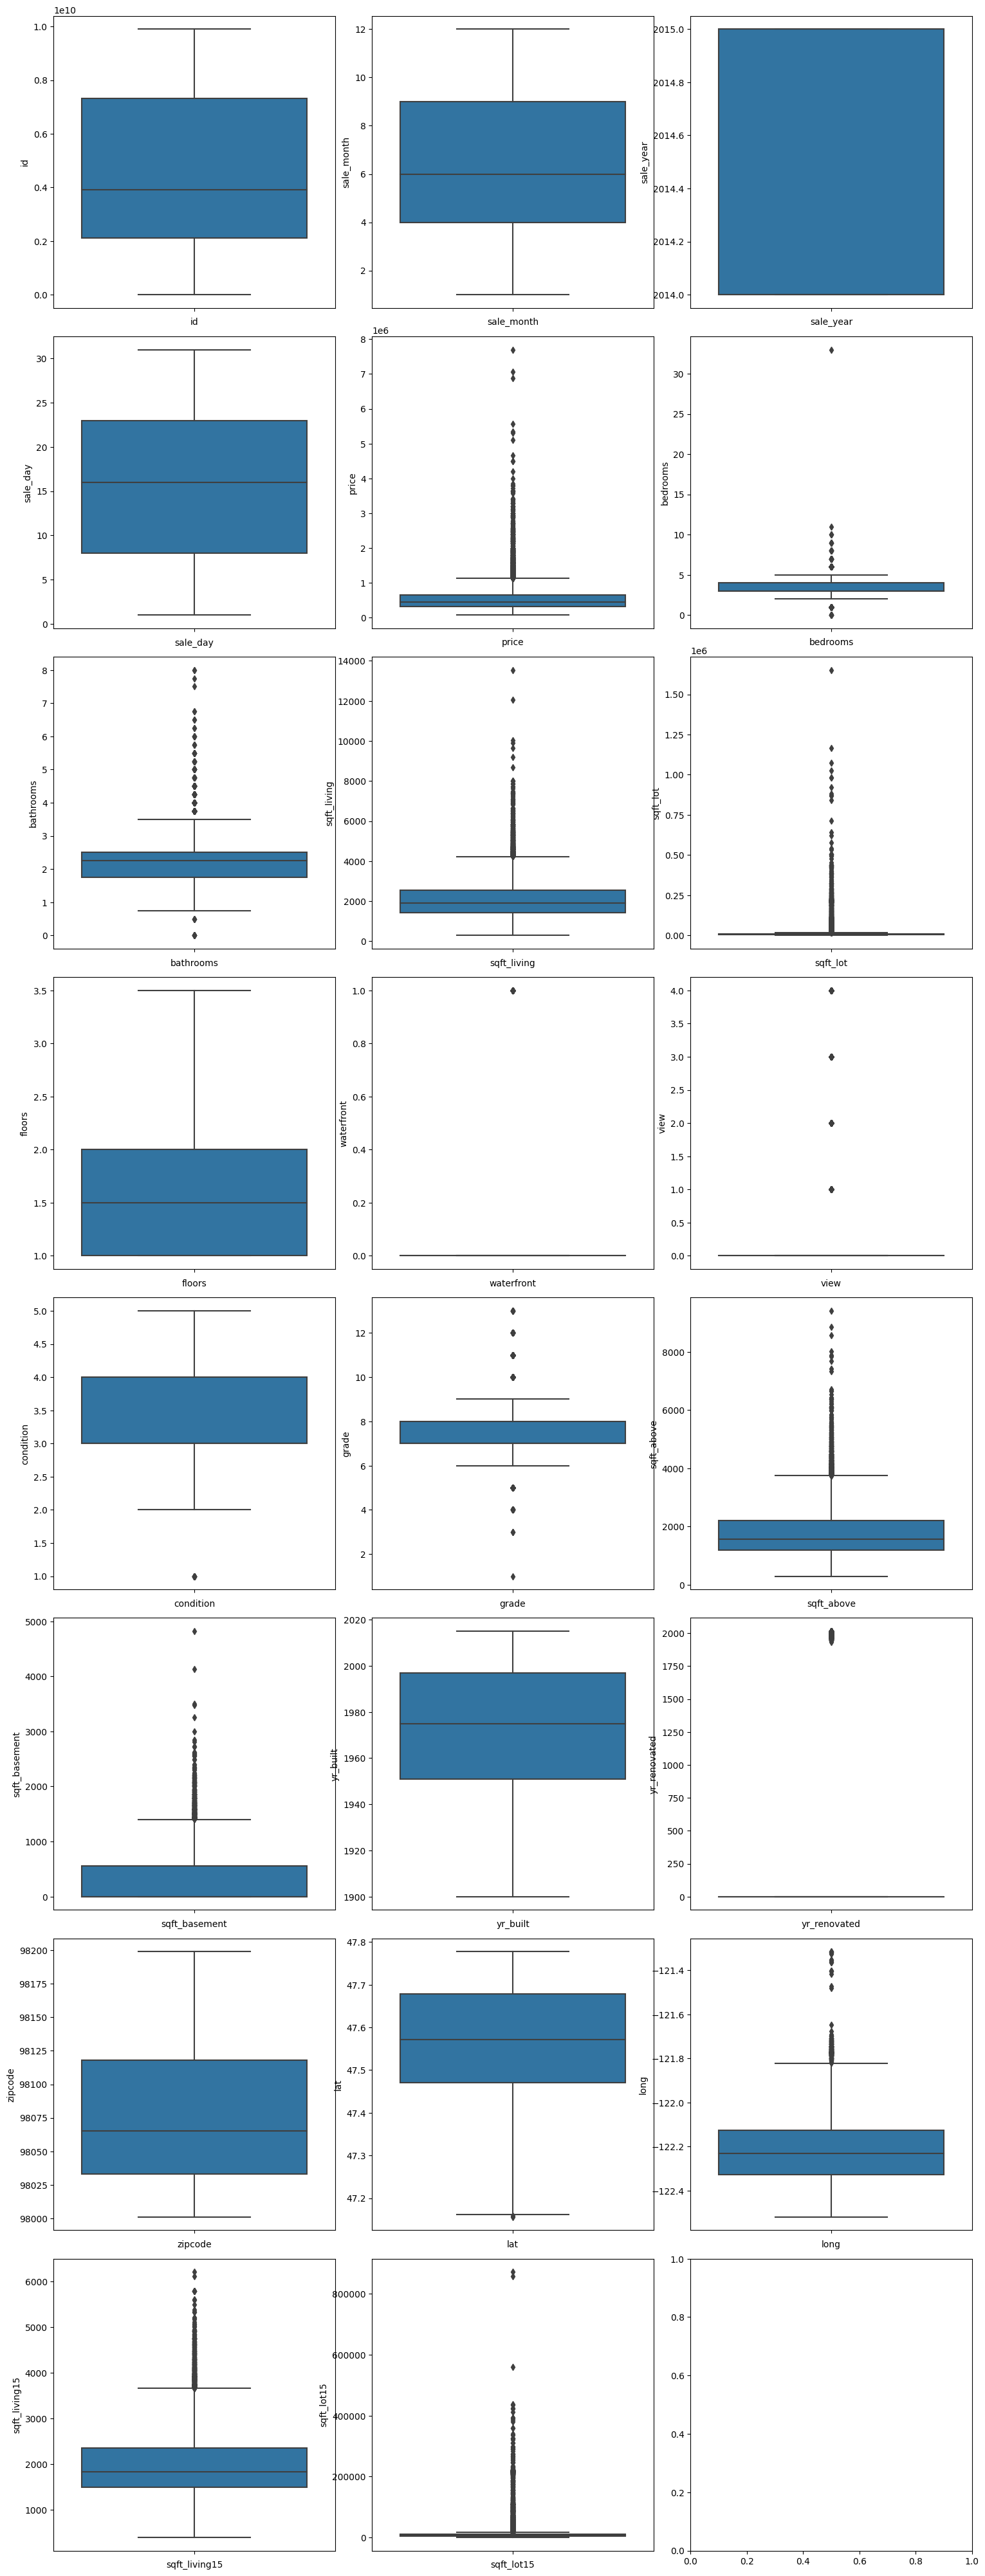

In [67]:
columns = df.columns.drop(['date'])

# Set the number of rows and columns for the subplots grid
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

# Iterate over the columns and create scatter plots with a line of best fit
for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]  # Select the appropriate subplot
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)

plt.show()

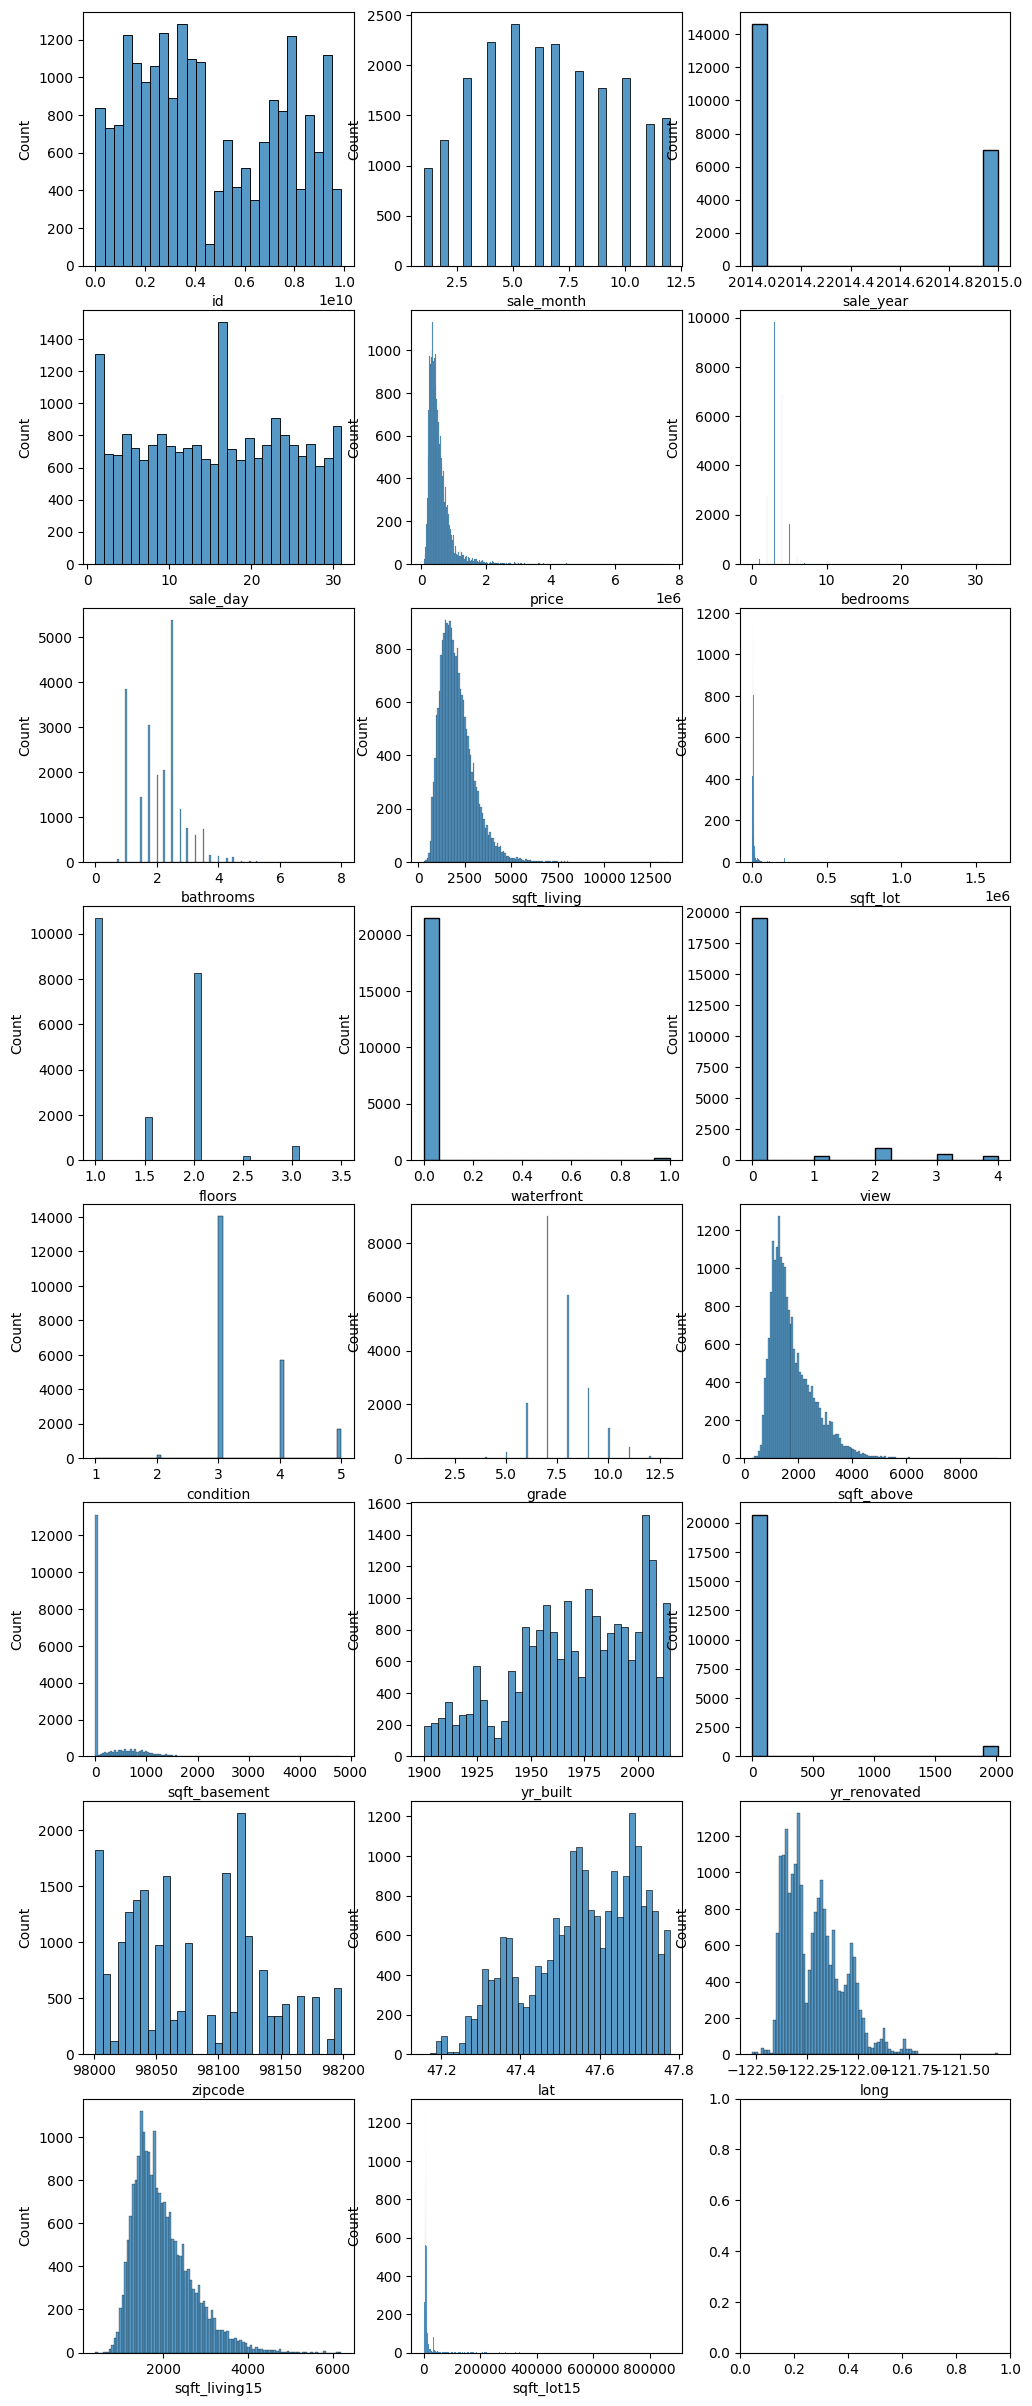

In [68]:
# Set the number of rows and columns for the subplots grid
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

# Iterate over the columns and create the density plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()


In [69]:
print(df[df['bedrooms'] > 30])

               id       date  sale_month  sale_year  sale_day     price   
15870  2402100895 2014-06-25           6       2014        25  640000.0  \

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
15870        33       1.75         1620      6000  ...      7        1040  \

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long   
15870            580      1947             0    98103  47.6878 -122.331  \

       sqft_living15  sqft_lot15  
15870           1330        4700  

[1 rows x 24 columns]


In [70]:
print(df[df['bathrooms'] == 0])

               id       date  sale_month  sale_year  sale_day      price   
875    6306400140 2014-06-12           6       2014        12  1095000.0  \
1149   3421079032 2015-02-17           2       2015        17    75000.0   
3119   3918400017 2015-02-05           2       2015         5   380000.0   
5832   5702500050 2014-11-04          11       2014         4   280000.0   
6994   2954400190 2014-06-24           6       2014        24  1295650.0   
9773   3374500520 2015-04-29           4       2015        29   355000.0   
9854   7849202190 2014-12-23          12       2014        23   235000.0   
10481   203100435 2014-09-18           9       2014        18   484000.0   
14423  9543000205 2015-04-13           4       2015        13   139950.0   
19452  3980300371 2014-09-26           9       2014        26   142000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
875           0        0.0         3064      4764  ...      7        3064  \
1149     

In [71]:
df= df[df['bathrooms'] != 0]
df=df[df['bedrooms'] != 33]

In [72]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")


Correlation between price and price: 1.00
Correlation between sqft_living and price: 0.70
Correlation between grade and price: 0.67
Correlation between sqft_above and price: 0.61
Correlation between sqft_living15 and price: 0.59
Correlation between bathrooms and price: 0.53
Correlation between view and price: 0.40
Correlation between sqft_basement and price: 0.32
Correlation between bedrooms and price: 0.32
Correlation between lat and price: 0.31
Correlation between waterfront and price: 0.27
Correlation between floors and price: 0.26
Correlation between yr_renovated and price: 0.13
Correlation between sqft_lot and price: 0.09
Correlation between sqft_lot15 and price: 0.08
Correlation between yr_built and price: 0.05
Correlation between zipcode and price: -0.05
Correlation between condition and price: 0.04
Correlation between long and price: 0.02
Correlation between id and price: -0.02
Correlation between sale_day and price: -0.01
Correlation between sale_month and price: -0.01
Correla

In [73]:
df['grade_value'] = df['grade'] * df['sqft_living']
df['price_per_sqft'] = df['price']/df['sqft_living']
df['renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)
df['sqft_per_floor'] = df['sqft_living']/df['floors']

In [74]:
zip_price_per_sqft = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(zip_price_per_sqft.rename('zip_price_per_sqft'), left_on='zipcode', right_index=True)

In [75]:
df['sqft_living_squared'] = df['sqft_living'] ** 2

In [76]:
num_bins = 5
bin_width = (df['bathrooms'].max() - df['bathrooms'].min()) / num_bins
bins = [df['bathrooms'].min() + i * bin_width for i in range(num_bins+1)]
df['bathrooms_bin'] = pd.cut(df['bathrooms'], bins=bins, labels=False, include_lowest=True)

In [77]:
num_bins = 5
bin_width = (df['bedrooms'].max() - df['bedrooms'].min()) / num_bins
bins = [df['bedrooms'].min() + i * bin_width for i in range(num_bins+1)]
df['bedrooms_bin'] = pd.cut(df['bedrooms'], bins=bins, labels=False, include_lowest=True)

In [78]:
num_bins = 5
bin_width = (df['sqft_living'].max() - df['sqft_living'].min()) / num_bins
bins = [df['sqft_living'].min() + i * bin_width for i in range(num_bins+1)]
df['sqft_living_bins'] = pd.cut(df['sqft_living'], bins=bins, labels=False, include_lowest=True)

In [79]:
columns = df.columns.drop(['id', 'date'])

In [80]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")

Correlation between price and price: 1.00
Correlation between grade_value and price: 0.76
Correlation between sqft_living_squared and price: 0.73
Correlation between sqft_living and price: 0.70
Correlation between grade and price: 0.67
Correlation between sqft_above and price: 0.61
Correlation between sqft_living_bins and price: 0.60
Correlation between sqft_living15 and price: 0.59
Correlation between price_per_sqft and price: 0.56
Correlation between zip_price_per_sqft and price: 0.55
Correlation between bathrooms and price: 0.53
Correlation between bathrooms_bin and price: 0.45
Correlation between sqft_per_floor and price: 0.43
Correlation between view and price: 0.40
Correlation between sqft_basement and price: 0.32
Correlation between bedrooms and price: 0.32
Correlation between lat and price: 0.31
Correlation between waterfront and price: 0.27
Correlation between floors and price: 0.26
Correlation between bedrooms_bin and price: 0.25
Correlation between yr_renovated and price: 0.

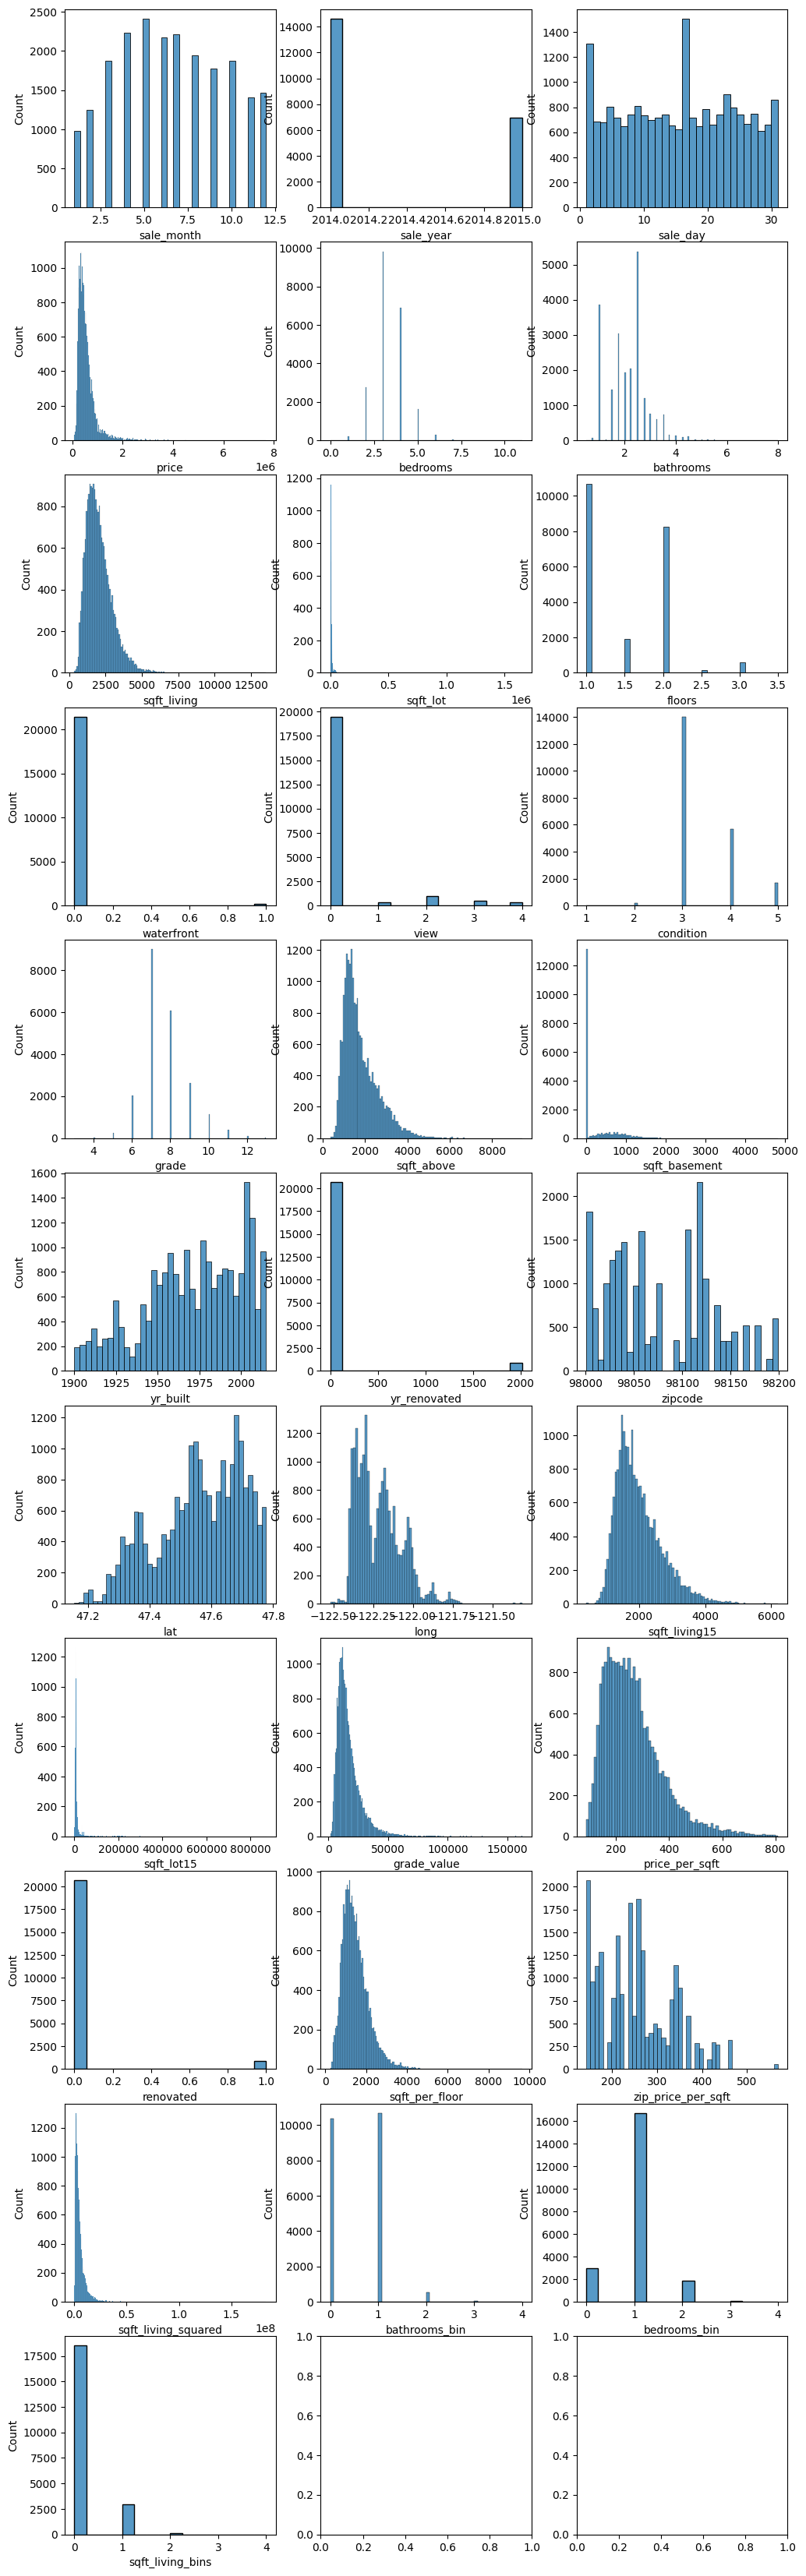

In [81]:
# Set the number of rows and columns for the subplots grid
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

# Iterate over the columns and create the density plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

In [82]:
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_above'] = np.log(df['sqft_above'])
df['log_sqft_living15'] = np.log(df['sqft_living15'])
df['log_grade_value'] = np.log(df['grade_value'])
df['log_sqft_per_floor'] = np.log(df['sqft_per_floor'])

In [83]:
columns = df.columns.drop(['id', 'date'])

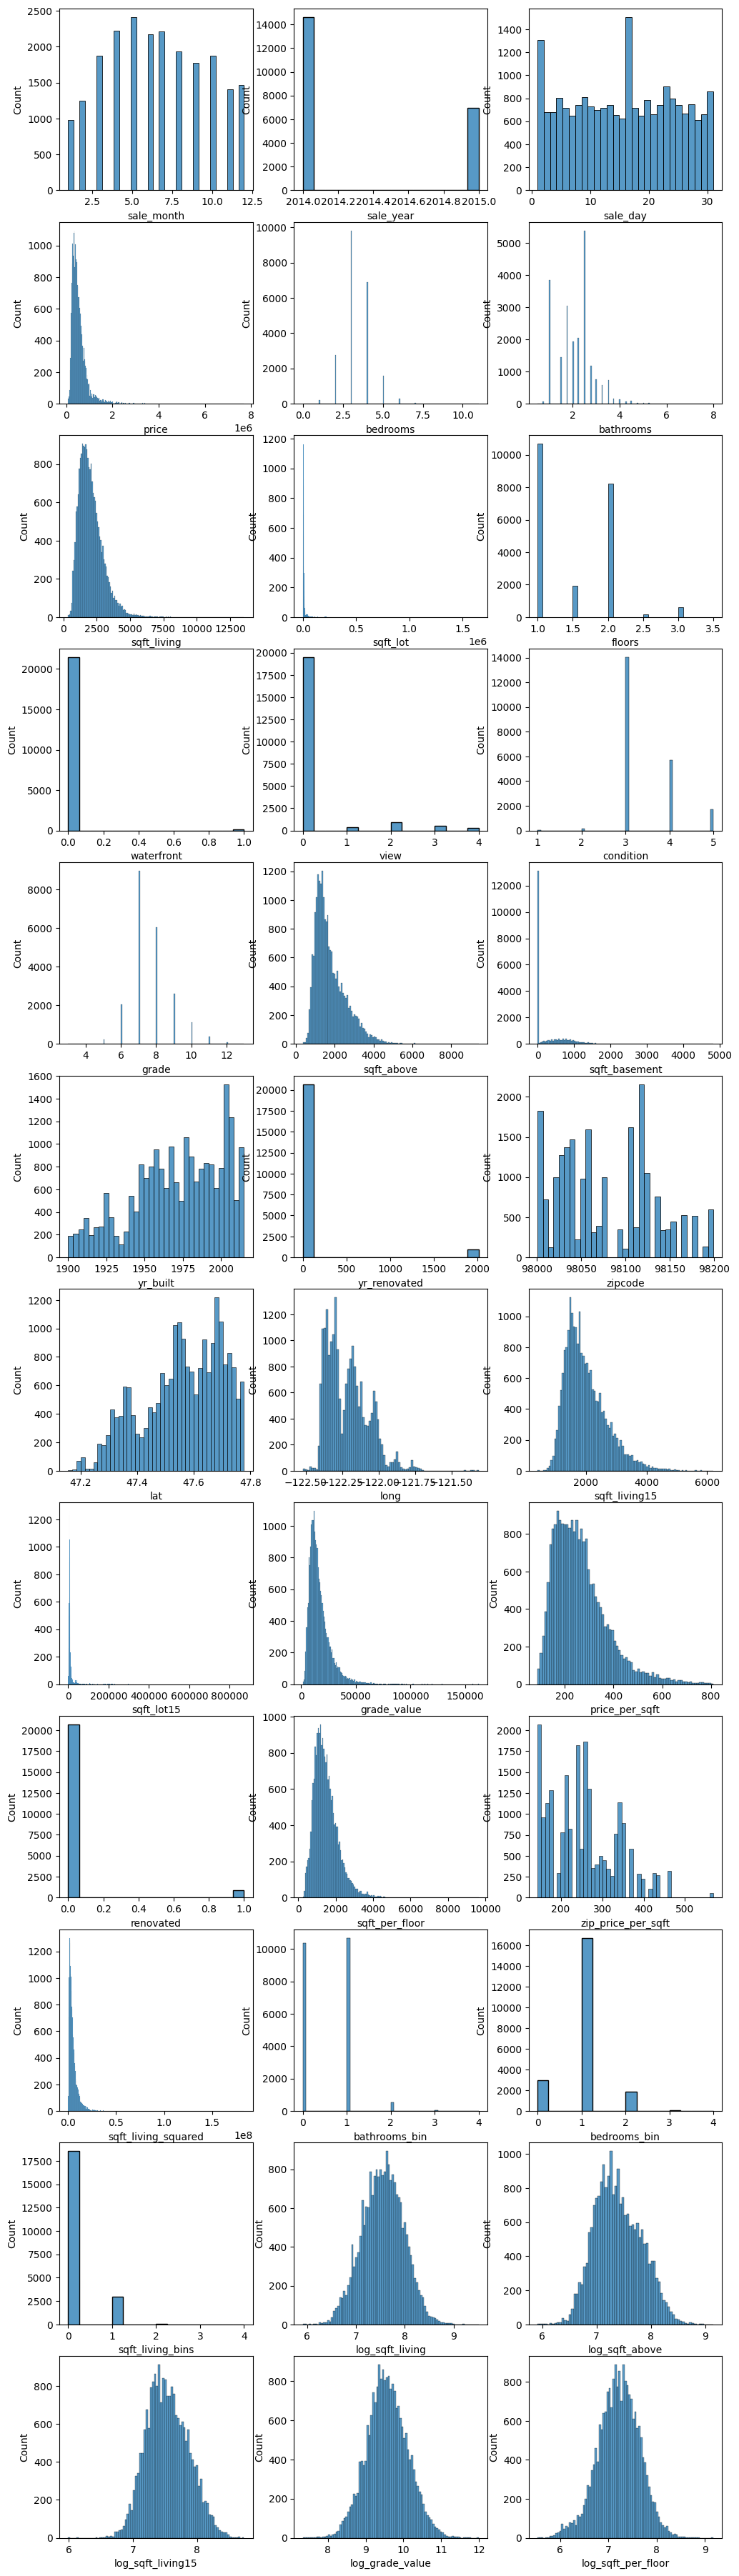

In [84]:
# Set the number of rows and columns for the subplots grid
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

# Iterate over the columns and create the density plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

In [85]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")

Correlation between price and price: 1.00
Correlation between grade_value and price: 0.76
Correlation between sqft_living_squared and price: 0.73
Correlation between sqft_living and price: 0.70
Correlation between grade and price: 0.67
Correlation between log_grade_value and price: 0.65
Correlation between log_sqft_living and price: 0.61
Correlation between sqft_above and price: 0.61
Correlation between sqft_living_bins and price: 0.60
Correlation between sqft_living15 and price: 0.59
Correlation between price_per_sqft and price: 0.56
Correlation between zip_price_per_sqft and price: 0.55
Correlation between log_sqft_living15 and price: 0.54
Correlation between log_sqft_above and price: 0.54
Correlation between bathrooms and price: 0.53
Correlation between bathrooms_bin and price: 0.45
Correlation between sqft_per_floor and price: 0.43
Correlation between view and price: 0.40
Correlation between log_sqft_per_floor and price: 0.38
Correlation between sqft_basement and price: 0.32
Correl

In [98]:
results = ols("price ~ grade_value + grade + log_grade_value + sqft_living + sqft_living_squared + log_sqft_living + sqft_living_bins +  sqft_living15 + log_sqft_living15 + sqft_above + log_sqft_above + zip_price_per_sqft + bathrooms + bathrooms_bin + sqft_per_floor + log_sqft_per_floor + lat + view + sqft_basement + bedrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     4934.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:01:10   Log-Likelihood:            -2.8935e+05
No. Observations:               21602   AIC:                         5.787e+05
Df Residuals:                   21582   BIC:                         5.789e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.393e+05   5

In [87]:
def quantile_loss(y_test, elasticnet_pred, q):
    residual = y_test - elasticnet_pred
    loss = np.where(residual >= 0, q * residual, (q - 1) * residual)
    return np.mean(loss)

In [93]:
categorical_features = ['grade', 'view', 'bathrooms_bin']
numerical_features = ['grade_value', 'log_grade_value', 'sqft_living', 'sqft_living_squared', 'log_sqft_living','sqft_living_bins','sqft_above', 'log_sqft_above', 'sqft_living15', 'log_sqft_living15','zip_price_per_sqft', 'bathrooms', 'bathrooms_bin','sqft_per_floor', 'log_sqft_per_floor','lat','sqft_basement', 'bedrooms']
target = 'price'

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1234)

In [95]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

In [96]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)])

In [97]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

linear_pred = linear_regression.predict(X_test)
print(linear_pred)

np.sqrt(mean_squared_error(linear_pred,y_test))

ValueError: Selected columns, ['grade', 'view', 'bathrooms_bin'], are not unique in dataframe